In [5]:
# import all the necessary libraries
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# video feed

In [ ]:
import cv2
# video feed
cap = cv2.VideoCapture(0)
while cap.isOpened():
    returns, frame = cap.read()
    cv2.imshow('window', frame)
    if cv2.waitKey(5) & 0xFF == ord('s'):
        break
cap.release()
cv2.destroyAllWindows()

# make_detections

In [ ]:
# make detections
cap = cv2.VideoCapture(0)
# set mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5,min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        returns, frame = cap.read()
    # RECOLOR IMAGE 
        image = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)
        #image.flags.writeable=False

    # make detection

        result = pose.process(image)
    # recolor back to BGR

        #image.flags.writeable=True
        image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    
    #  render the detection 
        mp_drawing.draw_landmarks(image,result.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(0,0,255),thickness=2,circle_radius=2), # for ciecle landmark
                                  mp_drawing.DrawingSpec(color=(0,255,0),thickness=2,circle_radius=2) # for line connections
                                 )
        
        cv2.imshow('window', image)
        if cv2.waitKey(5) & 0xFF == ord('q'):
            
            break
cap.release()
cv2.destroyAllWindows()

In [1]:
#mp_pose.POSE_CONNECTIONS

In [2]:
#mp_drawing.draw_landmarks??

In [1]:
import cv2
# video feed
cap = cv2.VideoCapture(0)
while cap.isOpened():
    returns, frame = cap.read()
    cv2.imshow('window', frame)
    if cv2.waitKey(5) & 0xFF == ord('s'):
        break
cap.release()
cv2.destroyAllWindows()

In [15]:
print(mp_drawing.DrawingSpec)

<class 'mediapipe.python.solutions.drawing_utils.DrawingSpec'>


In [ ]:
# determining the joins

< img src="https://www.marktechpost.com/wp-content/uploads/2020/08/Screenshot-2020-08-25-at-10.01.08-PM.png">

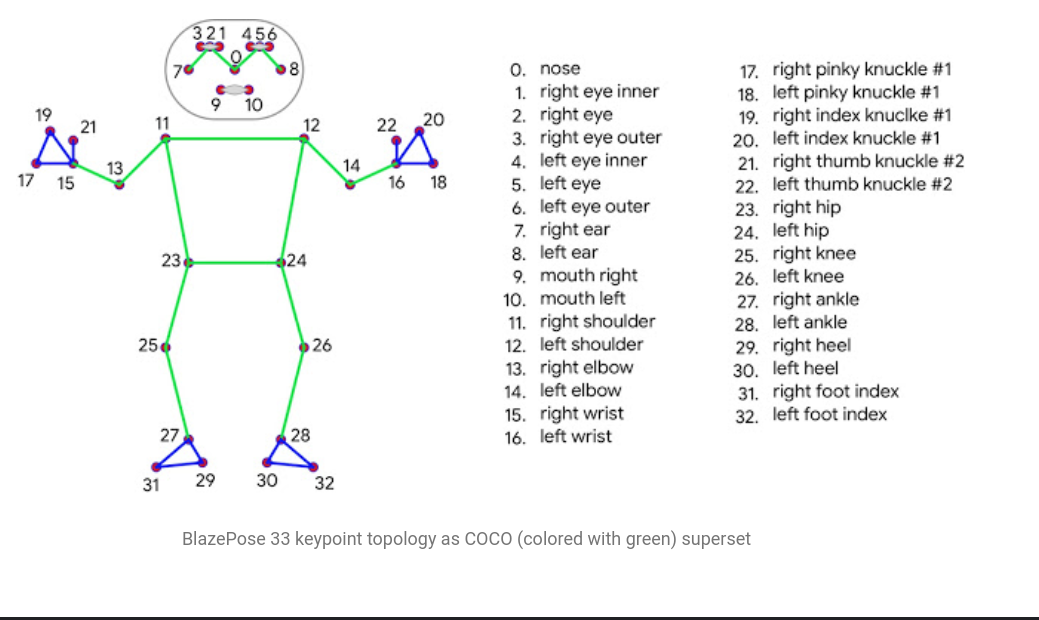

In [26]:
 from IPython.display import Image , display
display(Image("https://www.marktechpost.com/wp-content/uploads/2020/08/Screenshot-2020-08-25-at-10.01.08-PM.png", width= 700,height=700))




In [11]:
# make detections
cap = cv2.VideoCapture(0)
# set mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5,min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        returns, frame = cap.read()
# RECOLOR IMAGE 
        image = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)
        image.flags.writeable=False

# make detection
        
        result = pose.process(image)
        
# recolor back to BGR

        image.flags.writeable=True
        image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

# extract landmarks
        try:
            landmarks=result.pose_landmarks.landmark
            
        except:
            pass
             
    #  render the detection 
        mp_drawing.draw_landmarks(image,result.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(0,0,255),thickness=2,circle_radius=2), # for ciecle -landmark
                                  mp_drawing.DrawingSpec(color=(0,255,0),thickness=2,circle_radius=100) # for line -connections
                              )
        
        
        cv2.imshow('window', image)
        if cv2.waitKey(5) & 0xFF == ord('q'):
            
            break
cap.release()
cv2.destroyAllWindows()

In [6]:
len(landmarks)

33

In [8]:
for lm in mp_pose.PoseLandmark:
    print(lm , end=" ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 

In [18]:
landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]

x: 0.3746978
y: 0.74334073
z: -0.31046972
visibility: 0.9901869

In [19]:
landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]

x: 0.2872761
y: 1.0796734
z: -0.86663455
visibility: 0.17659007

In [20]:
landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]

x: 0.37116647
y: 0.8354474
z: -1.6979328
visibility: 0.4340322

In [21]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

x: 0.82250375
y: 0.7612227
z: -0.56080663
visibility: 0.9924794

In [22]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

x: 0.73527724
y: 1.1950732
z: -1.155093
visibility: 0.5931868

In [26]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.5999809
y: 0.7327204
z: -1.6184686
visibility: 0.97343713

In [13]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [20]:
def calculate_angle_l(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

# calculate angle

In [14]:
shoulder=(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x , landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y)
elbow=(landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x , landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y)
wrist=(landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x , landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y)

In [15]:
shoulder,elbow,wrist

((0.44129905104637146, 0.6895607113838196),
 (0.34123024344444275, 1.0375772714614868),
 (0.4143456518650055, 1.1341689825057983))

In [16]:
calculate_angle(shoulder,elbow,wrist)

126.8339025212257

In [21]:
# make detections
cap = cv2.VideoCapture(0)
# set mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5,min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        returns, frame = cap.read()
# RECOLOR IMAGE 
        image = cv2.cvtColor(frame , cv2.COLOR_BGR2RGB)
        image.flags.writeable=False

# make detection
        
        result = pose.process(image)
        
# recolor back to BGR

        image.flags.writeable=True
        image = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

# extract landmarks
        try:
            landmarks=result.pose_landmarks.landmark
            
            # Get coordinates for right elbow
            shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA

                    
                                )

         # Get coordinates for left elbow
            L_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            L_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            L_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            
            # Calculate angle
            angle1 = calculate_angle1(L_shoulder, L_elbow, L_wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle1), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )







        
            
        except:
            pass
             
    #  render the detection 
        mp_drawing.draw_landmarks(image,result.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(0,0,255),thickness=2,circle_radius=2), # for ciecle -landmark
                                  mp_drawing.DrawingSpec(color=(0,255,0),thickness=2,circle_radius=100) # for line -connections
                              )
        
        
        cv2.imshow('window', image)
        if cv2.waitKey(5) & 0xFF == ord('q'):
            
            break
cap.release()
cv2.destroyAllWindows()

In [1]:
pwd

'C:\\Users\\h\\Media_pipe_project'